In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import haversine as hs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('./Datasets/uber.csv')

In [3]:
df.head()


Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()


Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%           -73.991407         40.733823         1.000000  
50%           -73.980093         40.753042         1.000000  
75%           -73.963658         40.768001         2.000000  
max          1153.572603        872.697628       208.000000

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [9]:
df

fare_amount          pickup_datetime  pickup_longitude  \
0               7.5  2015-05-07 19:52:06 UTC        -73.999817   
1               7.7  2009-07-17 20:04:56 UTC        -73.994355   
2              12.9  2009-08-24 21:45:00 UTC        -74.005043   
3               5.3  2009-06-26 08:22:21 UTC        -73.976124   
4              16.0  2014-08-28 17:47:00 UTC        -73.925023   
...             ...                      ...               ...   
199995          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199997         30.9  2009-06-29 00:42:00 UTC        -73.986017   
199998         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0             40.738354         -73.999512         40.723217                1  
1             40.728225         -73.994710         40.750325                1  
2             40.740770         -73.962565         40.772647                1  
3             40.790844         -73.965316         40.803349                3  
4             40.744085         -73.973082         40.761247                5  
...                 ...                ...               ...              ...  
199995        40.739367         -73.986525         40.740297                1  
199996        40.736837         -74.006672         40.739620                1  
199997        40.756487         -73.858957         40.692588                2  
199998        40.725452         -73.983215         40.695415                1  
199999        40.720077         -73.985508         40.768793                1  

[200000 rows x 7 columns]

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df = df.drop('pickup_datetime', axis=1)

In [11]:
df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  
0              40.723217                1    19    7      5  2015          3  
1              40.750325                1    20   17      7  2009          4  
2              40.772647                1    21   24      8  2009          0  
3              40.803349                3     8   26      6  2009          4  
4              40.761247                5    17   28      8  2014          3  
...                  ...              ...   ...  ...    ...   ...        ...  
199995         40.740297                1    10   28     10  2012          6  
199996         40.739620                1     1   14      3  2014          4  
199997         40.692588                2     0   29      6  2009          0  
199998         40.695415                1    14   20      5  2015          2  
199999         40.768793                1     4   15      5  2010          5  

[200000 rows x 11 columns]

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

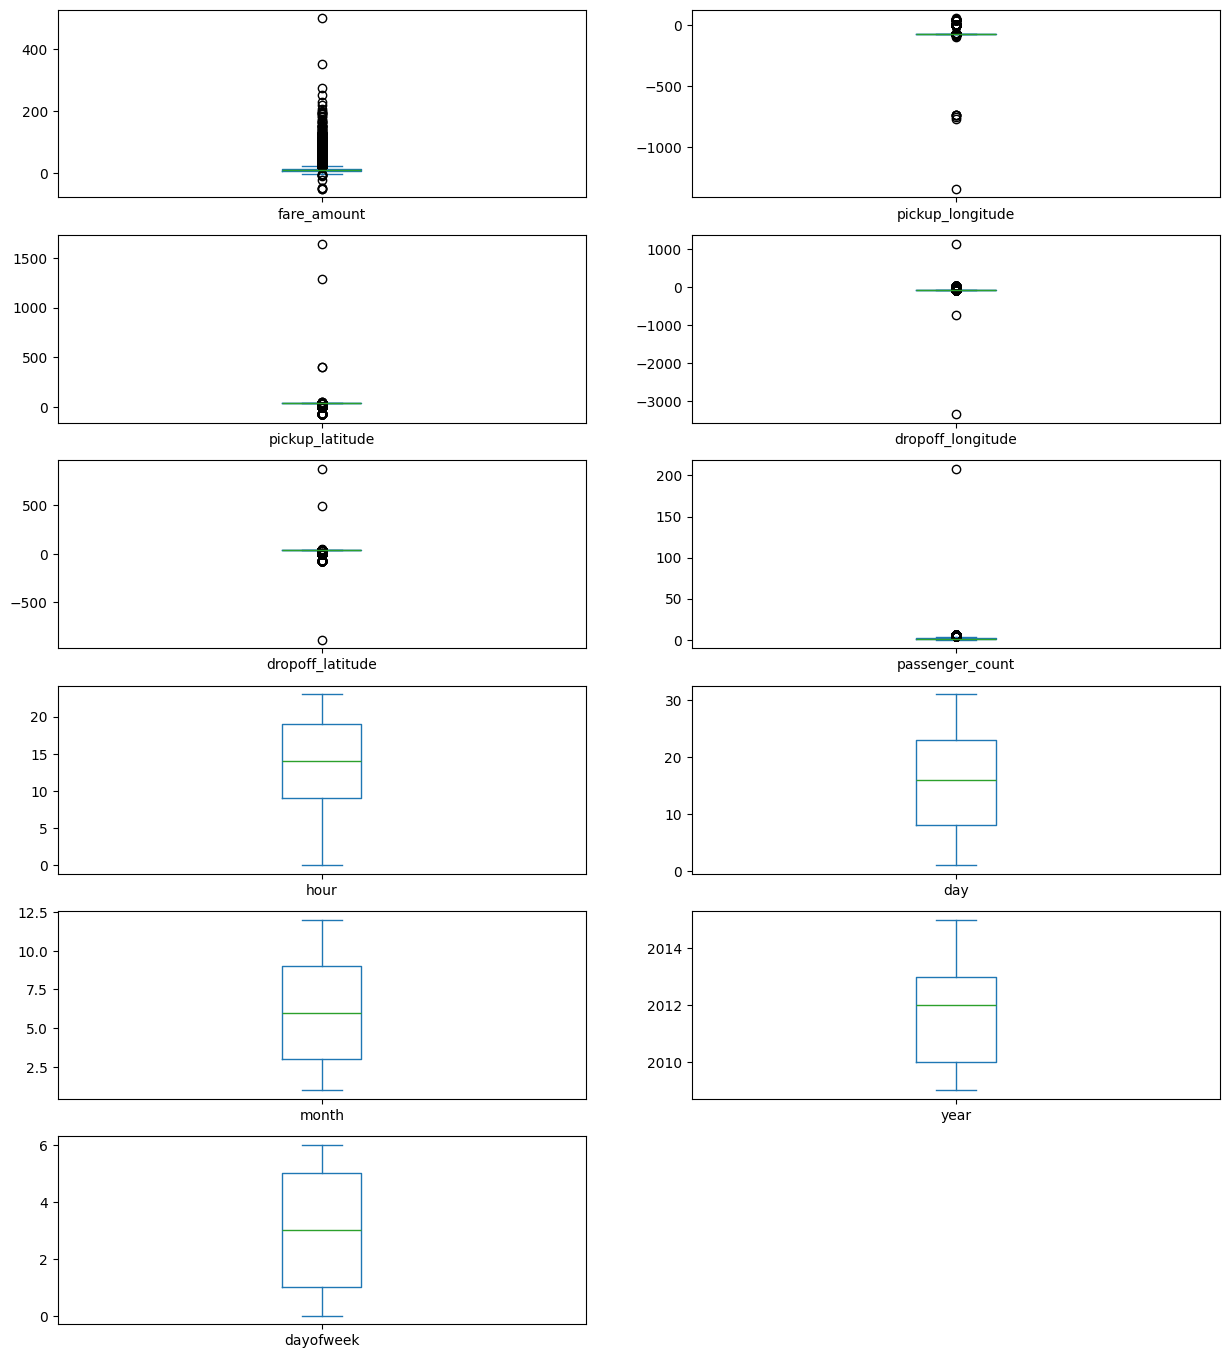

In [12]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))


In [13]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)
    return df

In [14]:
for c in df.select_dtypes(include=np.number).columns:
    df = remove_outlier(df, c)

In [15]:
travel_dist = []
for i in range(len(df)):
    long1, lat1 = df.loc[i, ['pickup_longitude','pickup_latitude']]
    long2, lat2 = df.loc[i, ['dropoff_longitude','dropoff_latitude']]
    loc1, loc2 = (lat1, long1), (lat2, long2)
    travel_dist.append(hs.haversine(loc1, loc2))
df['dist_travel_km'] = travel_dist

<Axes: >

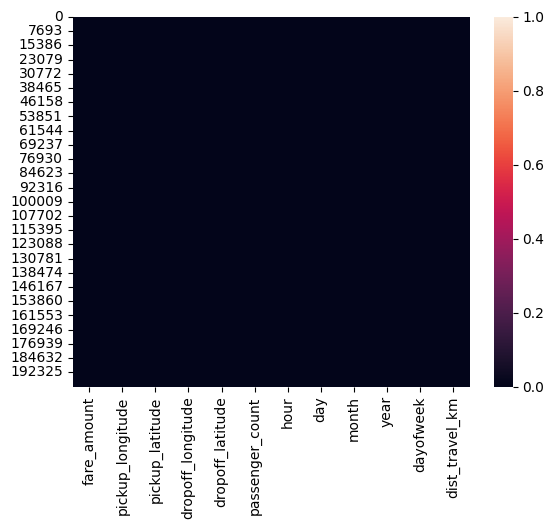

In [17]:
sns.heatmap(df.isnull())


In [18]:
df = df.loc[(df['dist_travel_km'] >= 1) & (df['dist_travel_km'] <= 130)].copy()
df = df[(df['pickup_latitude'].between(-90,90)) &
        (df['dropoff_latitude'].between(-90,90)) &
        (df['pickup_longitude'].between(-180,180)) &
        (df['dropoff_longitude'].between(-180,180))]

<Axes: >

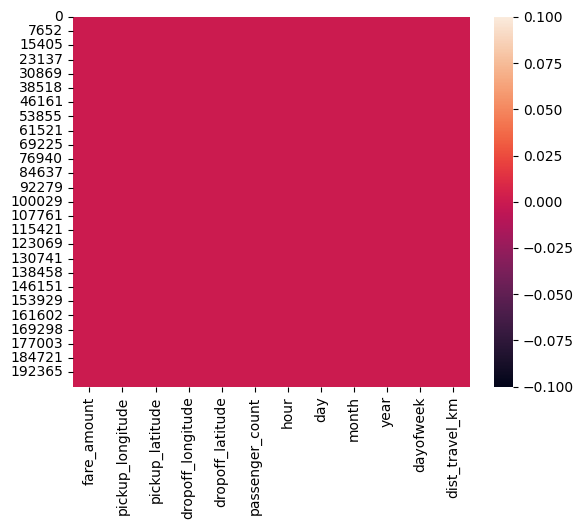

In [19]:
sns.heatmap(df.isnull())

<Axes: >

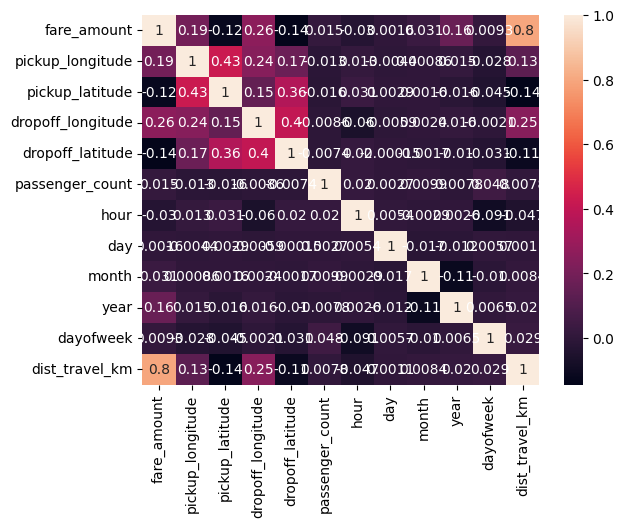

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [21]:
X = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
        'passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


In [27]:
print("Linear Regression: R2 =", r2_lr, "RMSE =", rmse_lr)

Linear Regression: R2 = 0.6809171995540892 RMSE = 3.018126277796632


In [28]:
print("Random Forest:     R2 =", r2_rf, "RMSE =", rmse_rf)


Random Forest:     R2 = 0.8288998184023391 RMSE = 2.2100950117117737
